# Reinforcement Learning

# Q-Learning

This notebook presents online control by **Q-learning**.

In [1]:
import numpy as np
from copy import deepcopy

In [2]:
from model import Walk, Maze, TicTacToe, Nim, ConnectFour
from agent import Agent, OnlineControl

## Q-learning

In [56]:
class QLearning(OnlineControl):
    """Online control by Q-learning."""
        
    def update_values(self):
        """Learn the state-action value online."""
        self.environment.reinit_state()
        state = self.environment.state
        for t in range(self.n_steps):
            state_code = self.environment.encode(state)
            action = self.get_best_action_randomized(state)
            self.add_action(state, action)
            self.action_count[state_code][action] += 1
            reward, stop = self.environment.step(action)
            if stop:
                gain = reward
            else:
                new_state = self.environment.state
                # to be modified
                new_action = self.get_best_action_randomized(new_state)
                self.add_action(new_state, new_action)
                gain = reward + self.gamma*np.max(list(self.action_value[self.environment.encode(new_state)].values()))
            td = gain - self.action_value[state_code][action]
            self.action_value[state_code][action] += td / self.action_count[state_code][action]
            state = deepcopy(new_state)
            if stop:
                break

## To do

Update the function ``update_values`` and test your code on various environments.

## Walk

In [57]:
walk = Walk()

In [58]:
# random policy
agent = Agent(walk)

In [59]:
stop, states, rewards = agent.get_episode(n_steps=10)

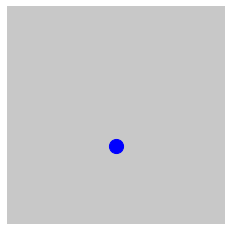

In [60]:
animation = walk.display(states)

In [61]:
animation

In [62]:
algo = QLearning(walk, gamma=0.9, eps=0.5, n_steps=10000)

In [63]:
for _ in range(100):
    algo.update_values()

In [64]:
policy = algo.get_policy()

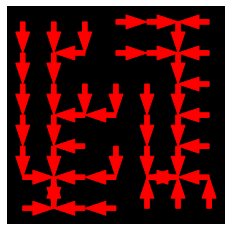

In [65]:
walk.display_policy(policy)

## Maze

In [66]:
maze = Maze()
# set parameters
maze_map = np.load('maze_small.npy')
maze.set_parameters(maze_map, (1, 0), [(3, 8)])
# init
maze = Maze()

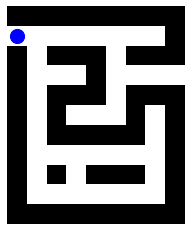

In [67]:
maze.display()

In [68]:
algo = QLearning(maze, eps=0.5, n_steps=10000)

In [69]:
for t in range(100):
    algo.update_values()

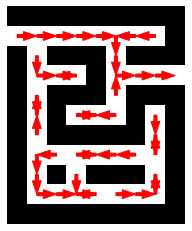

In [70]:
policy = algo.get_policy()
maze.display_policy(policy)

## Tic-Tac-Toe

In [71]:
Game = TicTacToe

In [72]:
game = Game()
agent = Agent(game)

In [73]:
agent.get_game_stats()

[61, 10, 29]

In [74]:
algo = QLearning(game, eps=0.5)

In [75]:
n_games = 1000
for i in range(n_games):
    algo.update_values()

In [76]:
len(algo.get_states())

2504

In [77]:
policy = algo.get_policy()

In [78]:
agent = Agent(game, policy)

In [79]:
agent.get_game_stats()

[88, 1, 11]

In [80]:
# train the adversary
game = Game(play_first=False, player=-1)

In [81]:
algo = QLearning(game, player=-1, eps=0.5)

In [82]:
n_games = 1000
for i in range(n_games):
    algo.update_values()

In [83]:
adversary_policy = algo.get_policy()

In [84]:
# after training (you might need to further train your player)
game = Game(adversary_policy=adversary_policy)
agent = Agent(game)
agent.get_game_stats()

[49, 11, 40]

## To do

* Compare with TD learning.
* Try other games (Nim, Connect Four)

In [85]:
Game = ConnectFour

In [86]:
game = Game()
agent = Agent(game)

In [87]:
agent.get_game_stats()

[48, 1, 51]

In [88]:
algo = QLearning(game, eps=0.5)

In [89]:
n_games = 1000
for i in range(n_games):
    algo.update_values()

In [90]:
len(algo.get_states())

16956

In [91]:
policy = algo.get_policy()

In [92]:
agent = Agent(game, policy)

In [93]:
agent.get_game_stats()

[51, 1, 48]

In [94]:
# train the adversary
game = Game(play_first=False, player=-1)

In [95]:
algo = QLearning(game, player=-1, eps=0.5)

In [96]:
n_games = 1000
for i in range(n_games):
    algo.update_values()

In [97]:
adversary_policy = algo.get_policy()

In [98]:
# after training (you might need to further train your player)
game = Game(adversary_policy=adversary_policy)
agent = Agent(game)
agent.get_game_stats()

[46, 0, 54]

In [99]:
def one_step_policy(state):
    game = Game()
    player, board = state
    actions = game.get_all_actions(state)
    # win move
    for action in actions:
        probs, states, rewards = game.get_model(state, action)
        if player in rewards:
            return [1], [action]
    # move to avoid defeat
    for action in actions:
        state = -player, board
        probs, states, rewards = game.get_model(state, action)
        if -player in rewards:
            return [1], [action]
    # random move
    if len(actions):
        probs = np.ones(len(actions)) / len(actions)
        return probs, actions
    return [1], [None]

In [100]:
# a stronger adversary
game = Game(adversary_policy=one_step_policy)

In [101]:
agent = Agent(game, policy)

In [102]:
agent.get_game_stats()

[3, 0, 97]